# `rayoptics` model of the horizontal imaging system

In [1]:
from rayoptics.environment import *
import matplotlib.pyplot as plt
import numpy as np

# Create lens models

We start by defining some optical systems.
For later convenience, we define each through a function.
Each model assumes:
    * a fixed distance between the image plane and eyepiece lens, set at 200mm
    * a fixed distance between the eyepiece and objective lenses, set at 275mm
    * a variable distance between the objective and object, should be around 75mm for the current setup/focus.

In [2]:
image_distance = 200.0
eyepiece_objective_separation = 275.0
wavelength = [(780, 1.0)]
on_axis = [0.]
off_axis = [0.5]
on_off_axis = [0.0, 0.5]
object_to_GC = 5.0
GC_thickness = 2.0


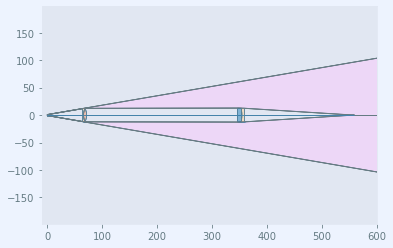

In [3]:
#%matplotlib notebook

def current_horizontal(object_plane_distance, object_field_radial, wavelengths, with_GC=True):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=25.0)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=object_field_radial)
    osp.spectral_region = WvlSpec(wavelengths, ref_wl=0)
    opm.radius_mode = True
    
    
    sm.gaps[0].thi=object_to_GC
    if with_GC:
        sm.add_surface([1e8, GC_thickness, 'N-BK7', 'Schott'])
    else:
        sm.add_surface([1e8, GC_thickness])
    sm.add_surface([1e8, object_plane_distance - GC_thickness - object_to_GC])
    # AC254-075-B, 75mm focal length, 1"
    sm.add_surface([-417.8, 1.6, 'N-SF6HT', 'Schott'])
    sm.add_surface([42.2, 5.0, 'N-BAF10', 'Schott'])
    sm.add_surface([-36.9, eyepiece_objective_separation])
    sm.set_stop()
    
    # AC508-200-B, 200mm focal length, 2"
    sm.add_surface([134.0, 8.2, 'N-LAK22', 'Schott'])
    sm.add_surface([-109.2, 5.0, 'N-SF6HT', 'Schott'])
    sm.add_surface([-515.2, image_distance])
    
    opm.update_model()
    return opm

model = current_horizontal(69.9, on_axis, wavelength);
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=True, offset_factor=0.0, do_draw_frame=True).plot()
# This is required because the plot gets super funky bounds otherwise.
layout_plt.update_axis_limits(((-10,-100),(600,100)))

#The other objective is ACA254-050-B

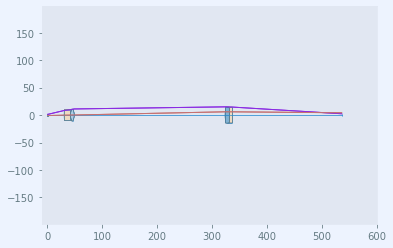

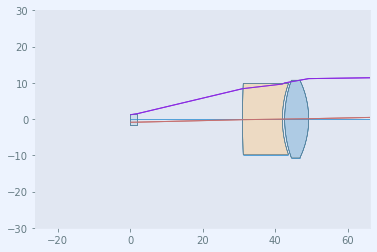

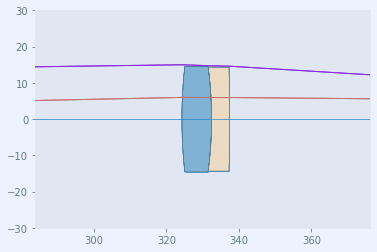

In [17]:
%matplotlib inline

def new_horizontal(object_plane_distance, object_field_radial, wavelengths, with_GC=True):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=20.0) # or define through NA 0.2
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=object_field_radial)
    osp.spectral_region = WvlSpec(wavelengths, ref_wl=0)
    opm.radius_mode = True
    
    
    sm.gaps[0].thi=object_to_GC
    if with_GC:
        sm.add_surface([1e8, GC_thickness, 'N-BK7', 'Schott'])
    else:
        sm.add_surface([1e8, GC_thickness])
    sm.add_surface([1e8, object_plane_distance - GC_thickness - object_to_GC])
    
    # ACA254-050-B
    sm.add_surface([271.16, 10.97, 'N-SF57', 'Schott'])
    sm.add_surface([29.52, 0.64])
    sm.add_surface([31.87, 6.64, 'N-SSK2', 'Schott'])
    sm.set_stop()
    sm.add_surface([-24.87, eyepiece_objective_separation])
    
    # AC508-200-B, 200mm focal length, 2"
    sm.add_surface([134.0, 8.2, 'N-LAK22', 'Schott'])
    sm.add_surface([-109.2, 5.0, 'N-SF6HT', 'Schott'])
    sm.add_surface([-515.2, image_distance])
    
    opm.update_model()
    return opm

model = new_horizontal(36, on_axis, wavelength)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=False,do_paraxial_layout=True, offset_factor=0.0, do_draw_frame=True).plot()
# This is required because the plot gets super funky bounds otherwise.
layout_plt.update_axis_limits(((-10,-100),(600,100)))

layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=False,do_paraxial_layout=True, offset_factor=0.0, do_draw_frame=True).plot()
layout_plt.update_axis_limits(((-10,-30),(50, 30)))

layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=False,do_paraxial_layout=True, offset_factor=0.0, do_draw_frame=True).plot()
layout_plt.update_axis_limits(((310,-30),(350, 30)))

I'm a little bit suspicious of the `ACA254` model.

Below I check the model against the Thorlab's spec by recreating the datasheet.

_Good thing I checked, it turns out the CAD model doesn't have the correct radii in it. You need to take the values from_ <https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=3471>. 

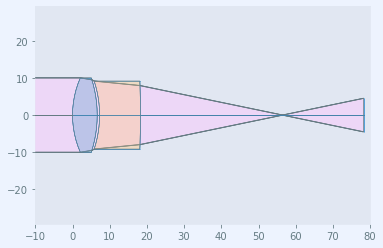

In [5]:
def aca_objective(distance, object_field_radial, wavelengths):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=20.0) # or define through NA 0.2
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=object_field_radial)
    osp.spectral_region = WvlSpec(wavelengths, ref_wl=0)
    opm.radius_mode = True
    
    
    sm.gaps[0].thi=1e8
    
    # ACA254-050-B. Order reversed
    sm.add_surface([24.87, 6.64, 'N-SSK2', 'Schott'])
    sm.add_surface([-31.87, 0.64])
    sm.add_surface([-29.52, 10.97, 'N-SF57', 'Schott'])
    sm.set_stop()
    sm.add_surface([-271.16, distance])
    
    opm.update_model()
    return opm

model = aca_objective(60, on_axis, wavelength)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=True, offset_factor=0.0, do_draw_frame=True).plot()
# This is required because the plot gets super funky bounds otherwise.
layout_plt.update_axis_limits(((-10,-20),(80,20)))


Plot the spot size as a function of working distance from the front face

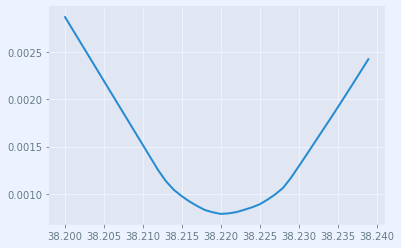

0.0007893611221812255


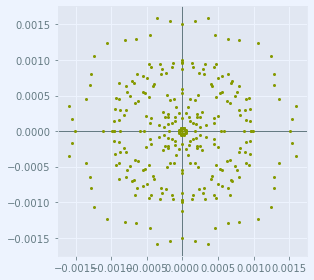

In [6]:
def get_spot_size(opt_model):
    seq_model = opt_model.seq_model
    osp = opt_model.optical_spec
    # get 0th field and wavelength.
    fld, wvl, foc = osp.lookup_fld_wvl_focus(0, wl=0)
    
    def spot(p, wi, ray_pkg, fld, wvl, foc):
        if ray_pkg is not None:
            image_pt = fld.ref_sphere[0]
            ray = ray_pkg[mc.ray]
            dist = foc / ray[-1][mc.d][2]
            defocused_pt = ray[-1][mc.p] - dist*ray[-1][mc.d]
            t_abr = defocused_pt - image_pt
            return np.array([t_abr[0], t_abr[1]])
        else:
            return None
    
    (points, _) = seq_model.trace_grid(spot, 0, num_rays=21, form='list', append_if_none=False)
    x = np.transpose(points)[0]
    y = np.transpose(points)[1]
    #plt.scatter(x,y)
    r = np.power(np.power(x,2) + np.power(y,2), 0.5)
    return np.mean(r)

distances = np.arange(38.2, 38.24, 0.001)
radii = [get_spot_size(aca_objective(d, on_axis, wavelength)) for d in distances]
plt.plot(distances, radii)
plt.show()
print(np.min(radii))

plt.figure(
    FigureClass=SpotDiagramFigure, 
    opt_model=aca_objective(distances[np.argmin(radii)], on_axis, wavelength)).plot().show()

Find the working distances for each setup, by minimising the circle of least confusion.

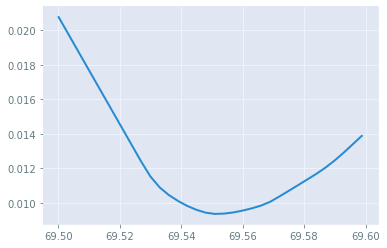

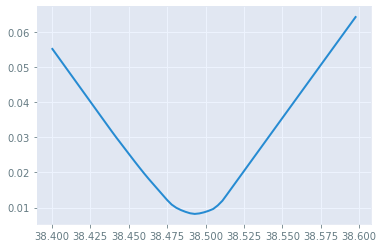

wd_current=69.55, radii=9.36um
wd_new=38.49, radii_new=8.20um


In [18]:
%matplotlib inline

def get_spot_size(opt_model):
    seq_model = opt_model.seq_model
    osp = opt_model.optical_spec
    # get 0th field and wavelength.
    fld, wvl, foc = osp.lookup_fld_wvl_focus(0, wl=0)
    
    def spot(p, wi, ray_pkg, fld, wvl, foc):
        if ray_pkg is not None:
            image_pt = fld.ref_sphere[0]
            ray = ray_pkg[mc.ray]
            dist = foc / ray[-1][mc.d][2]
            defocused_pt = ray[-1][mc.p] - dist*ray[-1][mc.d]
            t_abr = defocused_pt - image_pt
            return np.array([t_abr[0], t_abr[1]])
        else:
            return None
    
    (points, _) = seq_model.trace_grid(spot, 0, num_rays=21, form='list', append_if_none=False)
    x = np.transpose(points)[0]
    y = np.transpose(points)[1]
    #plt.scatter(x,y)
    r = np.power(np.power(x,2) + np.power(y,2), 0.5)
    return np.mean(r)

def get_current_spot_size(image_distance, with_GC=True):
    model = current_horizontal(image_distance, on_axis, wavelength, with_GC=with_GC)
    return get_spot_size(model)

# spot size for new objective
def get_new_spot_size(image_distance):
    model = new_horizontal(image_distance, on_axis, wavelength)
    return get_spot_size(model)

distances = np.arange(69.5, 69.6, 0.003)
radii = [get_current_spot_size(d) for d in distances]

distances_noGC = np.arange(68.75, 69.0, 0.003)
radii_noGC = [get_current_spot_size(d, with_GC=False) for d in distances_noGC]

distances_new = np.arange(38.4, 38.6, 0.003)
radii_new = [get_new_spot_size(d) for d in distances_new]

plt.plot(distances, radii)
#plt.plot(distances_noGC, radii_noGC)
plt.show()

plt.plot(distances_new, radii_new)
plt.show()

wd_current = distances[np.argmin(radii)]
#wd_current_noGC = distances_noGC[np.argmin(radii_noGC)]
wd_new = distances_new[np.argmin(radii_new)]

print("wd_current={:.2f}, radii={:.2f}um".format(wd_current, np.min(radii)*1e3))
#print("wd_current_noGC={:.2f}, radii_noGC={:.2f}um".format(wd_current_noGC, np.min(radii_noGC)*1e3))
print("wd_new={:.2f}, radii_new={:.2f}um".format(wd_new, np.min(radii_new)*1e3))

# Spot Diagrams


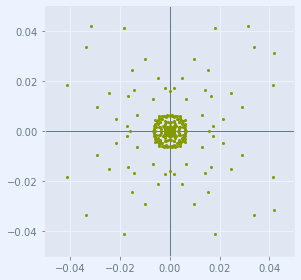

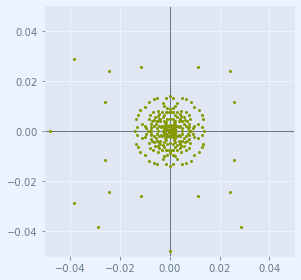

In [8]:
def set_limits(fig):
    for ax in fig.get_axes():
        ax.set_ylim(-0.05,0.05)
        ax.set_xlim(-0.05,0.05)
    return fig

model = current_horizontal(wd_current, on_axis, wavelength)
p = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()).show()

model = new_horizontal(wd_new, on_axis, wavelength)
p = set_limits(plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()).show()

# Plot the wavefront abberation

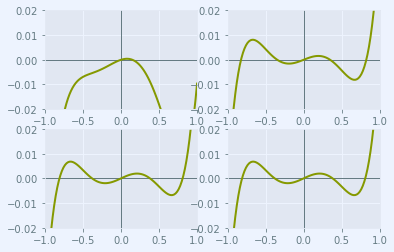

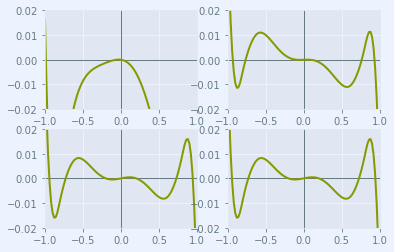

In [9]:
def set_limits(fig):
    for ax in fig.get_axes():
        ax.set_ylim(-0.02,0.02)
        ax.set_xlim(-1,1)
    return fig

model = current_horizontal(wd_current, on_off_axis, wavelength)
p = set_limits(plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray').plot())

model = new_horizontal(wd_new, on_off_axis, wavelength)
p = set_limits(plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray').plot())